In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
music = pd.read_csv('train.csv')

In [ ]:
music.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
music.shape

(17996, 17)

In [ ]:
music.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
music = music.dropna(subset=['Popularity', 'key','instrumentalness'])
music.shape

(11813, 17)

In [ ]:
music.describe(include = 'all')

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,11813,11813,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,1.181300e+04,11813.000000,11813.000000
unique,6703,10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Rolling Stones,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,43.100652,0.524944,0.670305,5.972573,-8.215807,0.623974,0.071107,0.239968,0.178991,0.195096,0.470115,122.928641,2.129446e+05,3.913824,6.622619
std,NaN,NaN,16.568500,0.166013,0.242324,3.167348,4.239682,0.484407,0.067783,0.319142,0.303809,0.159743,0.244635,29.430883,1.158561e+05,0.381625,3.246656
min,NaN,NaN,1.000000,0.064400,0.000020,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,NaN,NaN,32.000000,0.413000,0.513000,3.000000,-9.994000,0.000000,0.034600,0.001890,0.000096,0.096900,0.271000,100.001000,1.755330e+05,4.000000,5.000000
50%,NaN,NaN,42.000000,0.527000,0.716000,6.000000,-7.314000,1.000000,0.046300,0.056100,0.004290,0.127000,0.462000,120.046000,2.178830e+05,4.000000,8.000000
75%,NaN,NaN,54.000000,0.638000,0.875000,9.000000,-5.341000,1.000000,0.076500,0.421000,0.209000,0.256000,0.660000,141.877000,2.635870e+05,4.000000,10.000000


In [ ]:
music.groupby('Class').size()

Class
0      386
1     1037
2      956
3      270
4      148
5      517
6     2039
7      464
8     1523
9     1099
10    3374
dtype: int64

In [ ]:
music1 = music.drop(columns=['Artist Name','Track Name','mode','Class','time_signature','key'])
music1.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0
5,53.0,0.235,0.977,0.878,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0
6,48.0,0.674,0.658,-9.647,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
music1_scale = pd.DataFrame(sc.fit_transform(music1), columns=music1.columns)

In [ ]:
music1_corr = music1_scale.corr()

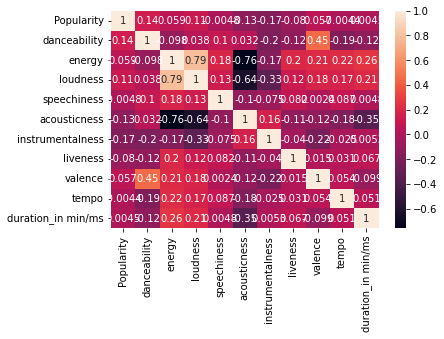

In [ ]:
sns.heatmap(music1_corr,annot=True)
plt.show()

In [ ]:
music1_scale.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.657863,-0.861080,0.593013,0.232529,-0.450090,-0.748501,-0.575982,-0.589070,0.404232,-0.220004,0.334812
1,-0.488940,-0.547837,-0.232364,-0.027879,-0.274522,0.770948,-0.588537,1.245203,1.295395,0.841069,-0.891468
2,0.597505,-2.156218,1.257441,0.928601,2.137688,-0.751419,-0.536186,-0.144588,-1.546515,2.586894,0.146873
3,0.597505,-1.746593,1.265694,2.145018,0.529548,-0.740887,-0.569300,-0.144588,-0.936600,1.020174,-0.041532
4,0.295715,0.897898,-0.050781,-0.337585,0.485287,0.513999,-0.589178,-0.607225,0.845726,0.691934,1.005103


In [ ]:
music1_scale['Class'] = music['Class'].tolist() 
music1_scale['key'] = music['key'].tolist() 
music1_scale['mode'] = music['mode'].tolist() 
music1_scale['time_signature'] = music['time_signature'].tolist() 

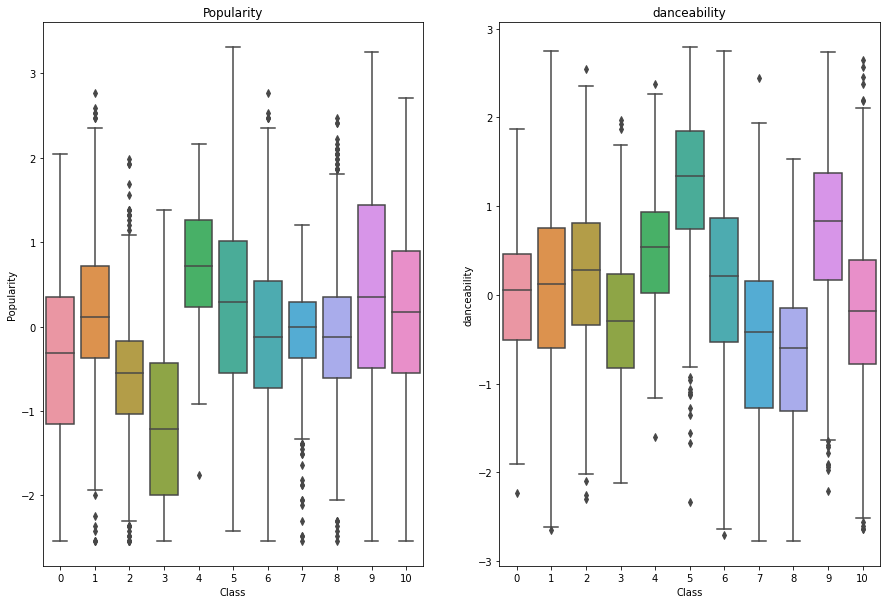

In [ ]:
fig, ax = plt.subplots(ncols = 2,nrows = 1, figsize=(15, 10))
g = sns.boxplot(data = music1_scale, x = 'Class', y='Popularity', ax = ax[0])
g.set_title('Popularity')
f = sns.boxplot(data = music1_scale, x = 'Class', y='danceability', ax = ax[1])
f.set_title('danceability')
plt.show()

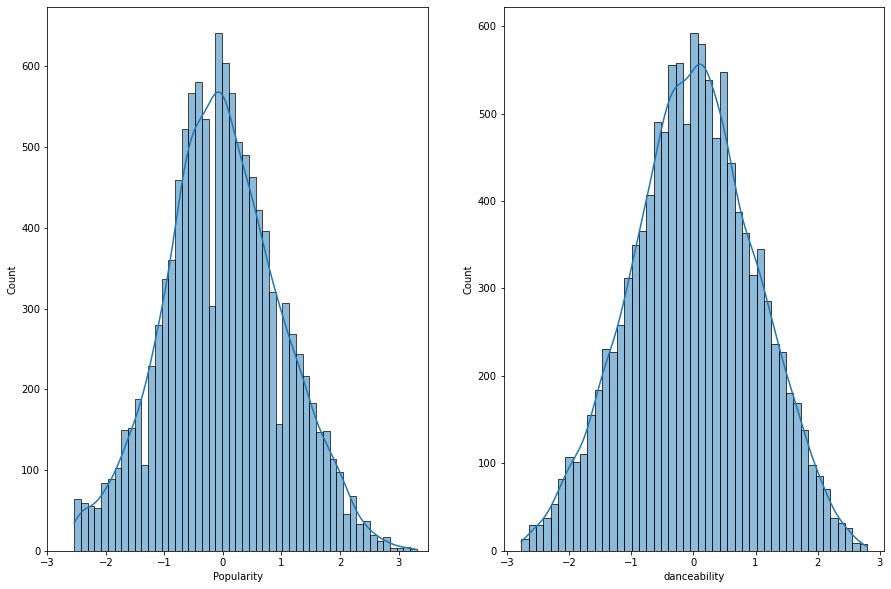

In [ ]:
fig, ax = plt.subplots(ncols = 2,nrows = 1, figsize=(15, 10))
g = sns.histplot(data = music1_scale, x = 'Popularity',kde=True,ax = ax[0])
g.set(xlim=(-3,3.5))
sns.histplot(data = music1_scale, x = 'danceability',kde=True,ax = ax[1])
plt.show()

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

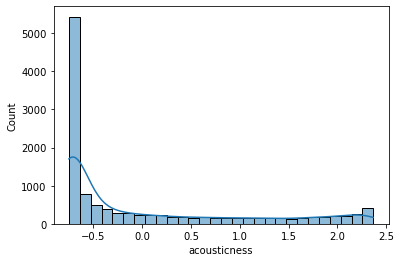

In [ ]:
sns.histplot(data = music1_scale, x = 'acousticness',kde=True)

- logistic regression
- KNN
- decision tree
- rf 
- NN
- svm
- pca
- sdm
- hierarchical clustering

In [ ]:
music1_scale.Class.value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

In [ ]:
music1_scale.loc[music1_scale.Class == 10, 'class'] = 0 # Rock Music
music1_scale.loc[music1_scale.Class == 6, 'class'] = 1 # Indie Music Genre
music1_scale.loc[music1_scale.Class == 8, 'class'] = 2 # Metal Music Genre
# music1_scale.loc[music1_scale.Class == 9, 'class'] = 3
# music1_scale.loc[music1_scale.Class == 1, 'class'] = 4
# music1_scale['class'].fillna(3,inplace = True)

In [ ]:
music1_scale = music1_scale.dropna()

In [ ]:
music1_scale = music1_scale.drop('Class', axis=1)

In [ ]:
len(music1_scale)

6936

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(music1_scale, music1_scale["class"]):
    strat_train_set = music1_scale.iloc[train_index]
    strat_test_set = music1_scale.iloc[test_index]

In [ ]:
strat_train_set = strat_train_set.reset_index(drop = True)
strat_test_set = strat_test_set.reset_index(drop = True)

In [ ]:
train_X = strat_train_set.drop('class', axis = 1)
test_X = strat_test_set.drop('class', axis = 1)
train_y = strat_train_set['class']
test_y = strat_test_set['class']

In [ ]:
train_y.unique()

array([1., 0., 2.])

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(train_X, train_y)
pred_y = knn_model.predict(test_X)
train_knn = knn_model.score(train_X, train_y)
test_knn = knn_model.score(test_X, test_y)

In [ ]:
train_knn

0.6955659697188176

In [ ]:
test_knn

0.5734870317002881

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf_knn = GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})
grid_clf_knn.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})

In [ ]:
grid_clf_knn.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = grid_clf_knn.predict(test_X)

train_knn = grid_clf_knn.score(train_X, train_y)
test_knn = grid_clf_knn.score(test_X, test_y)

In [ ]:
train_knn

0.6366258111031002

In [ ]:
test_knn

0.5987031700288185

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tr_model = DecisionTreeClassifier(
                random_state=42, 
                criterion='entropy',
                splitter='best', 
                max_depth=5, 
                min_samples_split=2)

tr_model.fit(train_X, train_y)
y_pred = tr_model.predict(test_X)

train_tr = tr_model.score(train_X, train_y)
test_tr = tr_model.score(test_X, test_y)

In [ ]:
train_tr

0.6294160057678443

In [ ]:
test_tr

0.5893371757925072

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 
                'max_depth': [2, 5, 7, 9],
             }

grid_clf_tr = GridSearchCV(tr_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_tr.fit(train_X, train_y)

y_pred = grid_clf_tr.predict(test_X)

train_tr = grid_clf_tr.score(train_X, train_y)
test_tr = grid_clf_tr.score(test_X, test_y)

In [ ]:
grid_clf_tr.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
train_tr

0.6294160057678443

In [ ]:
test_tr 

0.5893371757925072

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

rf_model.fit(train_X, train_y)
y_pred = rf_model.predict(test_X)

train_rf = rf_model.score(train_X, train_y)
test_rf = rf_model.score(test_X, test_y)

In [ ]:
train_rf

0.9507930785868781

In [ ]:
test_rf

0.6044668587896254

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100],
                'max_depth': [2, 3, 4, 5, 7, 8],
             }

grid_clf_rf = GridSearchCV(rf_model, param_grid, cv=10, n_jobs=-1, refit = True)
grid_clf_rf.fit(train_X, train_y)

y_pred = grid_clf_rf.predict(test_X)

train_rf = grid_clf_rf.score(train_X, train_y)
test_rf = grid_clf_rf.score(test_X, test_y)

In [ ]:
grid_clf_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
train_rf

0.742790194664744

In [ ]:
test_rf

0.6188760806916427

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear',multi_class="auto")
log_model.fit(train_X, train_y)
y_pred = log_model.predict(test_X)

train_log = log_model.score(train_X, train_y)
test_log = log_model.score(test_X, test_y)

In [ ]:
train_log

0.6180605623648161

In [ ]:
test_log

0.6145533141210374